#### Import the necessary libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the datasets

In [3]:
sales_data = pd.read_csv('sales.csv/sales.csv',low_memory=False)
product_hierarchy_data = pd.read_csv('product_hierarchy.csv')
store_cities_data = pd.read_csv('store_cities.csv')

#### Explore the data:

In [4]:
print(sales_data.head())
print(product_hierarchy_data.head())
print(store_cities_data.head())

  product_id store_id      date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  1/2/2017    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  1/2/2017    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  1/2/2017    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  1/2/2017    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  1/2/2017    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  promo_bin_2  promo_discount_2  \
0         NaN         PR03          NaN               NaN   
1         NaN         PR03          NaN               NaN   
2         NaN         PR03          NaN               NaN   
3         NaN         PR03          NaN               NaN   
4         NaN         PR03          NaN               NaN   

   promo_discount_type_2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
  

In [5]:
print(sales_data.describe())
print(product_hierarchy_data.describe())
print(store_cities_data.describe())

              sales       revenue         stock         price  promo_bin_2  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.033434e+06          0.0   
mean   6.478832e-01  2.002449e+00  1.626518e+01  9.252753e+00          NaN   
std    4.282826e+01  8.922401e+01  4.223441e+01  1.135964e+01          NaN   
min    0.000000e+00  0.000000e+00  0.000000e+00  2.500000e-01          NaN   
25%    0.000000e+00  0.000000e+00  4.000000e+00  2.500000e+00          NaN   
50%    0.000000e+00  0.000000e+00  9.000000e+00  5.900000e+00          NaN   
75%    0.000000e+00  0.000000e+00  1.700000e+01  1.190000e+01          NaN   
max    2.765600e+04  5.249685e+04  4.655000e+03  2.499000e+02          NaN   

       promo_discount_2  promo_discount_type_2  
count               0.0                    0.0  
mean                NaN                    NaN  
std                 NaN                    NaN  
min                 NaN                    NaN  
25%                 NaN                    NaN  
50%

## Data Cleaning

#### Sales Data

In [6]:
# Convert 'date' column to datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data.dtypes

product_id                       object
store_id                         object
date                     datetime64[ns]
sales                           float64
revenue                         float64
stock                           float64
price                           float64
promo_type_1                     object
promo_bin_1                      object
promo_type_2                     object
promo_bin_2                     float64
promo_discount_2                float64
promo_discount_type_2           float64
dtype: object

In [7]:
# Check for missing values
sales_data.isnull().sum()

product_id                     0
store_id                       0
date                           0
sales                          0
revenue                        0
stock                          0
price                      15141
promo_type_1                   0
promo_bin_1               929410
promo_type_2                   0
promo_bin_2              1048575
promo_discount_2         1048575
promo_discount_type_2    1048575
dtype: int64

In [8]:
sales_data['sales'].fillna(0, inplace=True)
sales_data['revenue'].fillna(0, inplace=True)
sales_data['stock'].fillna(0, inplace=True)
sales_data['price'].fillna(0, inplace=True)

sales_data['promo_bin_1'].fillna('No Promo', inplace=True)
sales_data['promo_bin_2'].fillna('No Promo', inplace=True)
sales_data['promo_discount_2'].fillna('No Promo Discount', inplace=True)
sales_data['promo_discount_type_2'].fillna('No Promo Discount', inplace=True)


#### Product Hierarchy Data

In [9]:
# Check for missing values
print(product_hierarchy_data.isnull().sum())

product_id         0
product_length    18
product_depth     16
product_width     16
cluster_id        50
hierarchy1_id      0
hierarchy2_id      0
hierarchy3_id      0
hierarchy4_id      0
hierarchy5_id      0
dtype: int64


In [10]:
product_hierarchy_data['product_length'].fillna(0, inplace=True)
product_hierarchy_data['product_depth'].fillna(0, inplace=True)
product_hierarchy_data['product_width'].fillna(0, inplace=True)
product_hierarchy_data['cluster_id'].fillna('null', inplace=True)

In [11]:
# Print cleaned data
print(product_hierarchy_data.head())

  product_id  product_length  product_depth  product_width cluster_id  \
0      P0000             5.0           20.0           12.0       null   
1      P0001            13.5           22.0           20.0  cluster_5   
2      P0002            22.0           40.0           22.0  cluster_0   
3      P0004             2.0           13.0            4.0  cluster_3   
4      P0005            16.0           30.0           16.0  cluster_9   

  hierarchy1_id hierarchy2_id hierarchy3_id hierarchy4_id hierarchy5_id  
0           H00         H0004       H000401     H00040105   H0004010534  
1           H01         H0105       H010501     H01050100   H0105010006  
2           H03         H0315       H031508     H03150800   H0315080028  
3           H03         H0314       H031405     H03140500   H0314050003  
4           H03         H0312       H031211     H03121109   H0312110917  


#### Store Cities Data

In [12]:
# Check for missing values
print(store_cities_data.isnull().sum())

store_id        0
storetype_id    0
store_size      0
city_id         0
dtype: int64


#### Deduplicate Data

In [13]:
sales_data.drop_duplicates()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,P0420,S0066,2017-03-21,0.0,0.00,525.0,0.60,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount
1048571,P0420,S0070,2017-03-21,0.0,0.00,134.0,0.60,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount
1048572,P0420,S0085,2017-03-21,0.0,0.00,205.0,0.60,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount
1048573,P0420,S0087,2017-03-21,0.0,0.00,55.0,0.60,PR14,No Promo,PR03,No Promo,No Promo Discount,No Promo Discount


In [14]:
product_hierarchy_data.drop_duplicates()

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0000,5.0,20.0,12.0,null,H00,H0004,H000401,H00040105,H0004010534
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028
3,P0004,2.0,13.0,4.0,cluster_3,H03,H0314,H031405,H03140500,H0314050003
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917
...,...,...,...,...,...,...,...,...,...,...
694,P0744,2.0,7.0,7.0,null,H03,H0311,H031108,H03110802,H0311080202
695,P0745,0.0,0.0,0.0,cluster_0,H02,H0209,H020908,H02090804,H0209080422
696,P0746,1.0,1.0,1.0,cluster_0,H03,H0314,H031407,H03140702,H0314070202
697,P0747,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026


In [15]:
store_cities_data.drop_duplicates()

,store_id,storetype_id,store_size,city_id
0,S0091,ST04,19,C013
1,S0012,ST04,28,C005
2,S0045,ST04,17,C008
3,S0032,ST03,14,C019
4,S0027,ST04,24,C022
...,...,...,...,...
139,S0013,ST04,33,C026
140,S0118,ST03,20,C023
141,S0042,ST04,25,C020
142,S0086,ST03,12,C003


## Explatory Data Analysis 

#### Sales Trends Over Time 📅
##### I've visualized how sales quantities and revenues have evolved from 2017 to 2019. It's fascinating to observe how these metrics fluctuated over the years. Check out the graph below 👇

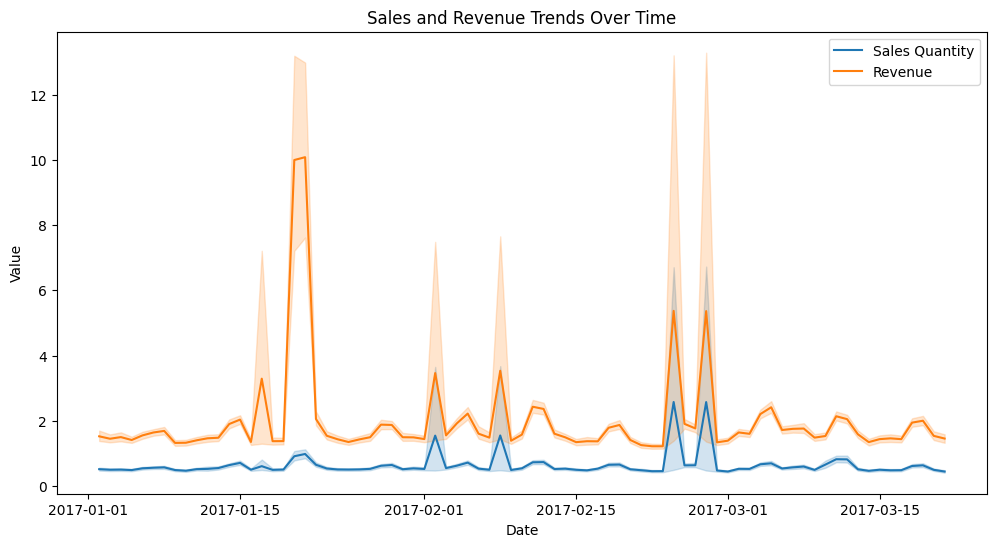

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data, x='date', y='sales', label='Sales Quantity')
sns.lineplot(data=sales_data, x='date', y='revenue', label='Revenue')
plt.title('Sales and Revenue Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Top Revenue Generating Products 💰
##### Identifying which products generate the highest revenue is crucial. Here's a bar chart showcasing the top revenue-generating products. These powerhouses play a significant role in overall revenue generation. Take a look 👀

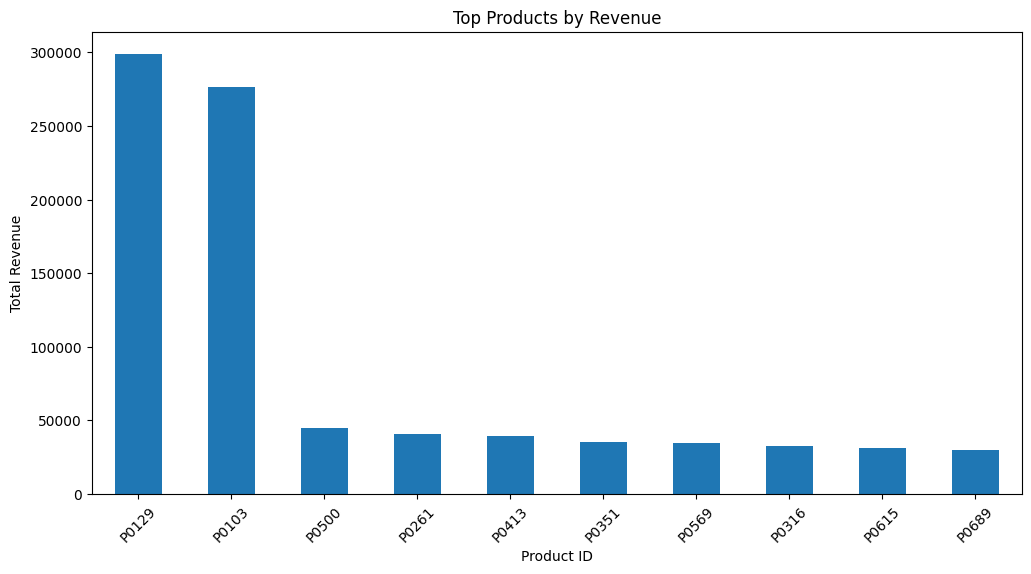

In [41]:
top_products = sales_data.groupby('product_id')['revenue'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


#### Store Size vs. Revenue 🏪
##### The relationship between store size and total revenue is always intriguing. I've plotted a scatter plot to visualize this connection. It's interesting to see how different store sizes impact revenue. See for yourself ⬇️


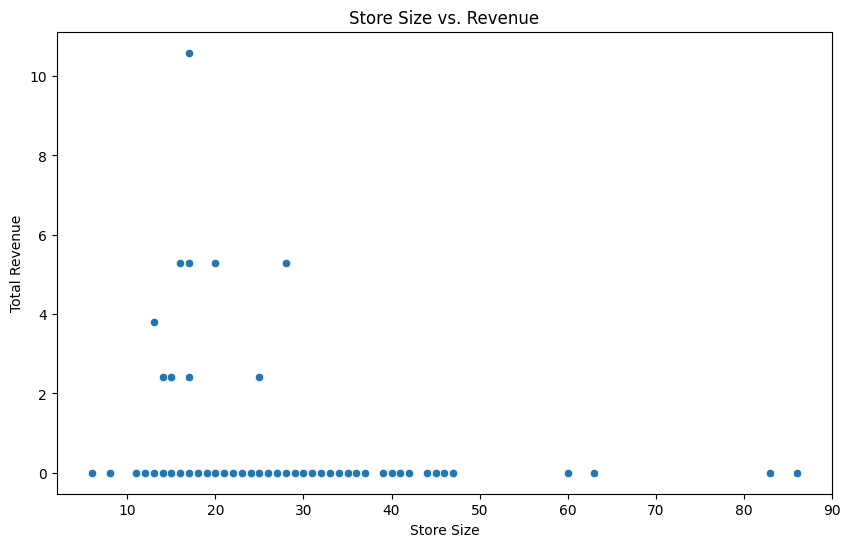

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_cities_data, x='store_size', y=sales_data['revenue'])
plt.title('Store Size vs. Revenue')
plt.xlabel('Store Size')
plt.ylabel('Total Revenue')
plt.show()

#### Product Revenue by Hierarchy Level 📊
##### Analyzing revenue contribution by hierarchy levels sheds light on where the money is coming from. Here's a bar chart showcasing the hierarchy levels that contribute the most to total revenue. This information can guide strategic decisions 🚀

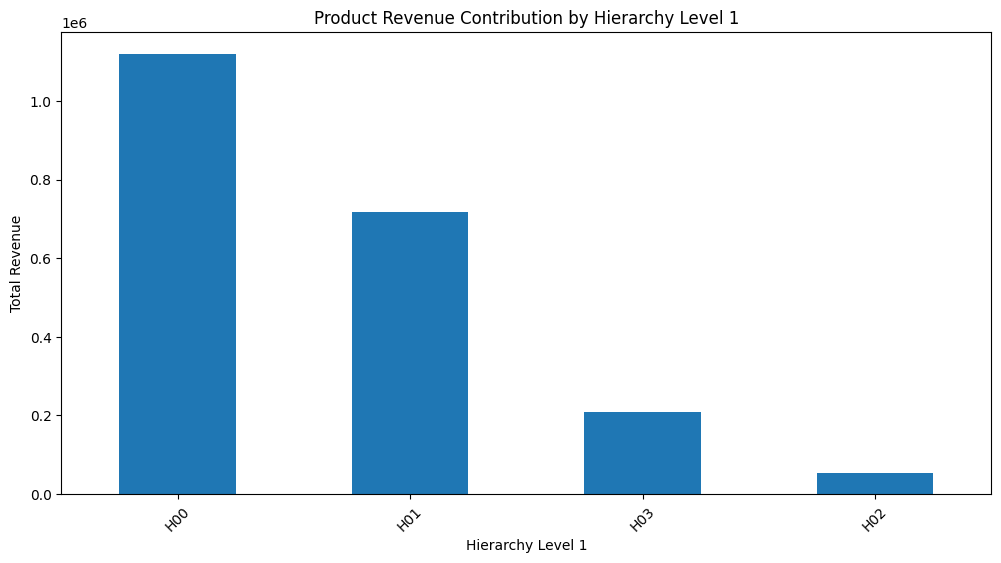

In [44]:
revenue_by_hierarchy = sales_data.merge(product_hierarchy_data, on='product_id').groupby('hierarchy1_id')['revenue'].sum()
plt.figure(figsize=(12, 6))
revenue_by_hierarchy.sort_values(ascending=False).plot(kind='bar')
plt.title('Product Revenue Contribution by Hierarchy Level 1')
plt.xlabel('Hierarchy Level 1')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#### Sales Quantity vs. Revenue Correlation 📈💱
##### Exploring the correlation between sales quantities and revenues can provide insights into pricing strategies and customer behavior. Here's a scatter plot highlighting this relationship. Intriguing, isn't it? 🔍


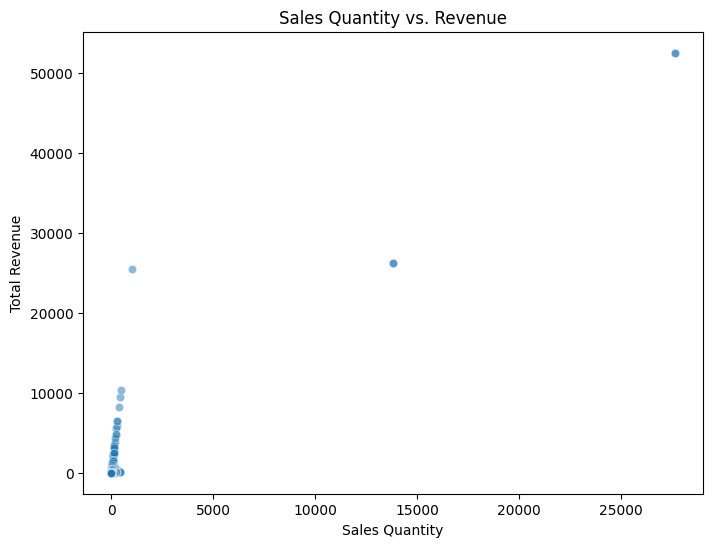

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_data, x='sales', y='revenue', alpha=0.5)
plt.title('Sales Quantity vs. Revenue')
plt.xlabel('Sales Quantity')
plt.ylabel('Total Revenue')
plt.show()

#### Cluster Analysis of Product Hierarchy 🛍️
##### Digging deeper into the product hierarchy, I've conducted a cluster analysis to identify distinct sales patterns. The bar chart below illustrates total sales quantity for different hierarchy levels. These insights could lead to targeted marketing approaches 📊

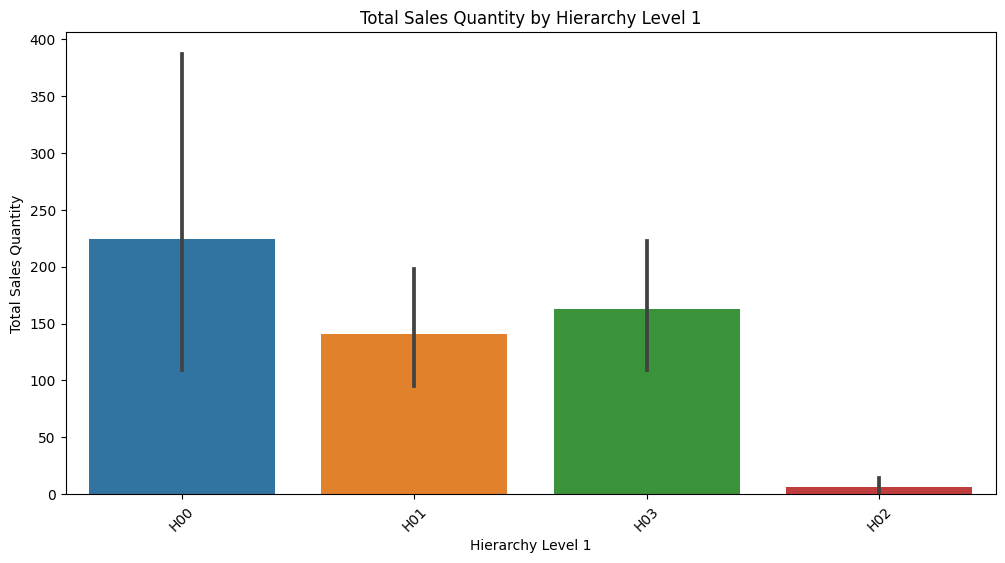

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_hierarchy_data, x='hierarchy1_id', y=sales_data['sales'], estimator=sum)
plt.title('Total Sales Quantity by Hierarchy Level 1')
plt.xlabel('Hierarchy Level 1')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()

#### Product Dimensions Correlation 🔍
##### Lastly, I've examined how product dimensions (length, depth, and width) correlate with each other. This can offer valuable insights for inventory management and product design. Explore the correlation in the pair plot 👇

c:\Users\PRATIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


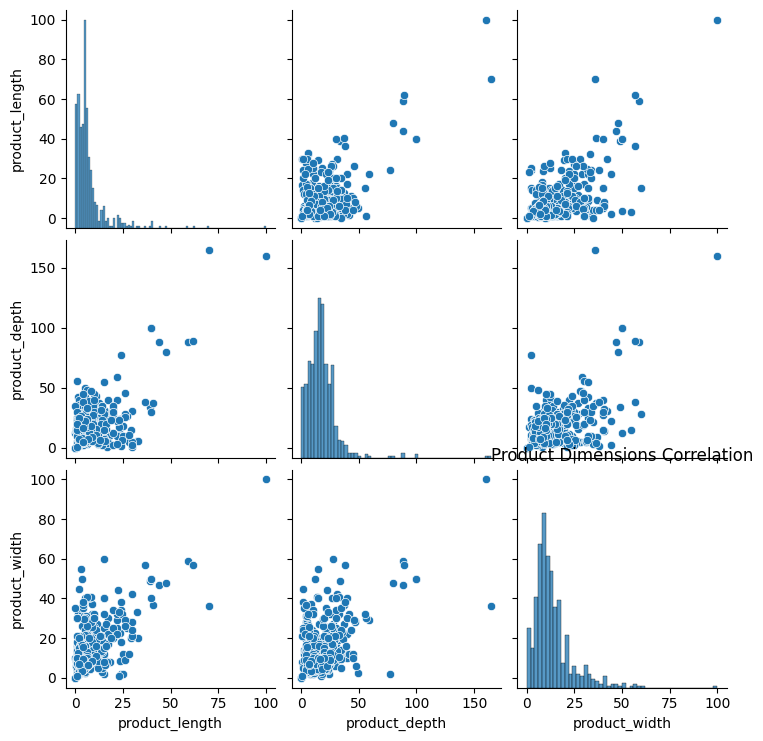

In [46]:
sns.pairplot(data=product_hierarchy_data[['product_length', 'product_depth', 'product_width']])
plt.title('Product Dimensions Correlation')
plt.show()